In [7]:
%pylab inline

import os
import anacal
import numpy as np
import fitsio

try:
    get_ipython().run_line_magic("matplotlib", "inline")
except NameError:
    # Not running in Jupyter, so skip the magic command
    import matplotlib
    matplotlib.use("Agg")
from astropy.visualization import simple_norm
import matplotlib.pylab as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/work/xiangchong.li/miniconda3/envs/image2/lib/python3.11/site-packages/IPython/core/magics/pylab.py:166: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Text(0.5, 1.0, 'Exposure')

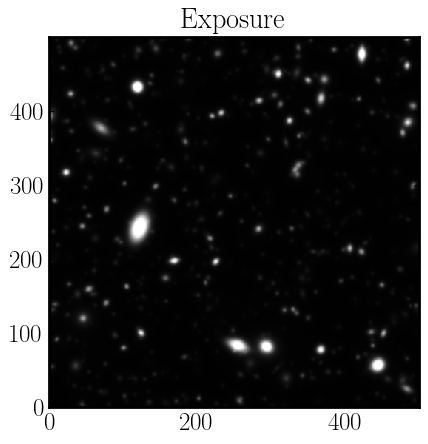

In [8]:
data_dir = os.getcwd()

gal_array = fitsio.read(os.path.join(data_dir, "gal.fits"))
psf_array = fitsio.read(os.path.join(data_dir, "psf.fits"))

# Display the galaxy image simulation
plt.imshow(
    gal_array,
    aspect="equal",
    cmap="Greys_r",
    origin="lower",
    interpolation="None",
    norm=simple_norm(gal_array, "asinh", asinh_a=0.2, min_cut=-0.1, max_cut=30),
)
plt.title("Exposure")

Text(0.5, 1.0, 'PSF')

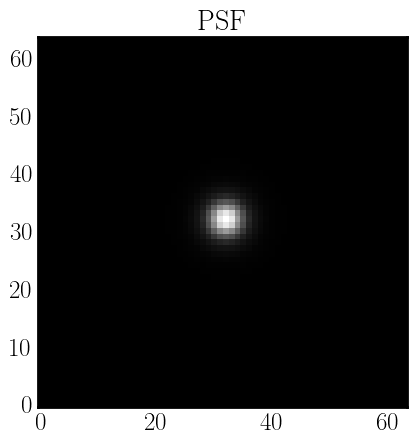

In [9]:
plt.close()
# Display the PSF image simulation
plt.imshow(psf_array, cmap="Greys_r", origin="lower")
plt.title("PSF")

In [10]:
fpfs_config = anacal.fpfs.FpfsConfig(
    sigma_arcsec=0.52,  # The first measurement scale (also for detection)
    sigma_arcsec1=0.45,  # The second measurement scale
    # sigma_arcsec2=0.55,  # The second measurement scale
)

In [11]:
mag_zero = 30.0
pixel_scale = 0.2
noise_variance = 0.23 ** 2.0
noise_array = None
detection = None

out = anacal.fpfs.process_image(
    fpfs_config=fpfs_config,
    mag_zero=mag_zero,
    gal_array=gal_array,
    psf_array=psf_array,
    pixel_scale=pixel_scale,
    noise_variance=noise_variance,
    noise_array=noise_array,
    detection=detection,
)

0.2


Text(0.5, 1.0, 'Exposure')

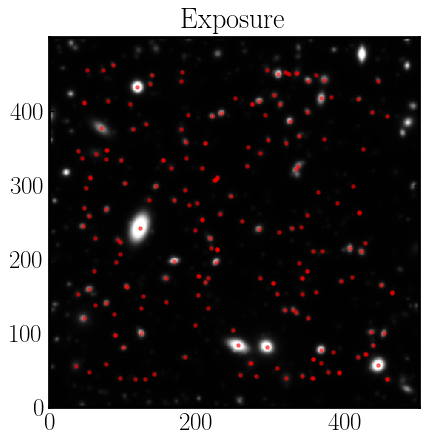

In [12]:
plt.close()
plt.scatter(out["x"], out["y"], marker="o", alpha=0.5, s=5.0, color="red")
# Display the galaxy image simulation
plt.imshow(
    gal_array,
    aspect="equal",
    cmap="Greys_r",
    origin="lower",
    interpolation="None",
    norm=simple_norm(gal_array, "asinh", asinh_a=0.2, min_cut=-0.1, max_cut=30),
)
plt.title("Exposure")

# Outcome

In [7]:
out.dtype.names

('y',
 'x',
 'is_peak',
 'mask_value',
 'e1',
 'e1_g1',
 'e2',
 'e2_g2',
 'q1',
 'q1_g1',
 'q2',
 'q2_g2',
 'w',
 'w_g1',
 'w_g2',
 'm00',
 'm00_g1',
 'm00_g2',
 'm20',
 'm20_g1',
 'm20_g2',
 'e1_1',
 'e1_g1_1',
 'e2_1',
 'e2_g2_1',
 'q1_1',
 'q1_g1_1',
 'q2_1',
 'q2_g2_1',
 'm00_1',
 'm00_g1_1',
 'm00_g2_1',
 'm20_1',
 'm20_g1_1',
 'm20_g2_1')

# Detection
+ 'y','x':       position on image
+ 'is_peak':     whether detection is true peak
+ 'mask_value':  a number quantifing the distance to the masked region 

# First Measurement kernel
+ 'w', 'w_g1', 'w_g2': Detection weight and its shear response

+ 'e1', 'e1_g1': 2nd order ellipticity and shear response (first component)
+ 'e2', 'e2_g2': 2nd order ellipticity and shear response (second component)

+ 'q1', 'q1_g1': 4th order ellipticity and shear response (first component)
+ 'q2', 'q2_g2': 4th order ellipticity and shear response (first component)

+ 'm00', 'm00_g1', 'm00_g2': Gaussian Flux and its shear response
+ 'm20', 'm20_g1', 'm20_g2': Shapelet mode 20 and its shear response

# Note: 
m00 + m20 is the trace moment size

# Second Measurement kernel

Similar to the first measurement kernel
+ 'e1_1', 'e1_g1_1': 2nd order ellipticity and shear response (first component)
+ 'e2_1', 'e2_g2_1': 2nd order ellipticity and shear response (second component)
+ 'q1_1', 'q1_g1_1': 4th order ellipticity and shear response (first component)
+ 'q2_1', 'q2_g2_1': 4th order ellipticity and shear response (first component)
+ 'm00_1', 'm00_g1_1', 'm00_g2_1': Gaussian Flux and its shear response
+ 'm20_1', 'm20_g1_1', 'm20_g2_1': Shapelet mode 20 and its shear response

# Shear Estimation

In [8]:
# base kernel scale
e1 = out["w"] * out["e1"]
e1g1 = out["w_g1"] * out["e1"] + out["w"] * out["e1_g1"]
print(np.sum(e1) / np.sum(e1g1))

# kernel 1
e1 = out["w"] * out["e1_1"]
e1g1 = out["w_g1"] * out["e1_1"] + out["w"] * out["e1_g1_1"]
print(np.sum(e1) / np.sum(e1g1))

-0.08082483802097448
-0.07772559103453001
